# Interrupted time series (with no additional predictor variables) - parameter recovery

This notebook shows an example of running Bayesian interupted time series on some synthetic data.

In [1]:
from causal_impact.causal_impact import LinearModel
from causal_impact.simulate_data import generate_time_series_data_simple

In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
RANDOM_SEED = 123
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = 'retina'

In [4]:
%load_ext autoreload
%autoreload 2

## Generate simulated dataset

In [12]:
treatment_time = "2017-01-01"

df = generate_time_series_data_simple(treatment_time, slope=0.0)
df.head()

,linear_trend,timeseries,causal effect,intercept
date,,,,
2010-01-31,0,0.427512,0,1.0
2010-02-28,1,-0.179630,0,1.0
2010-03-31,2,-0.448677,0,1.0
2010-04-30,3,-0.378857,0,1.0
2010-05-31,4,-0.270725,0,1.0


Create some useful visualisations

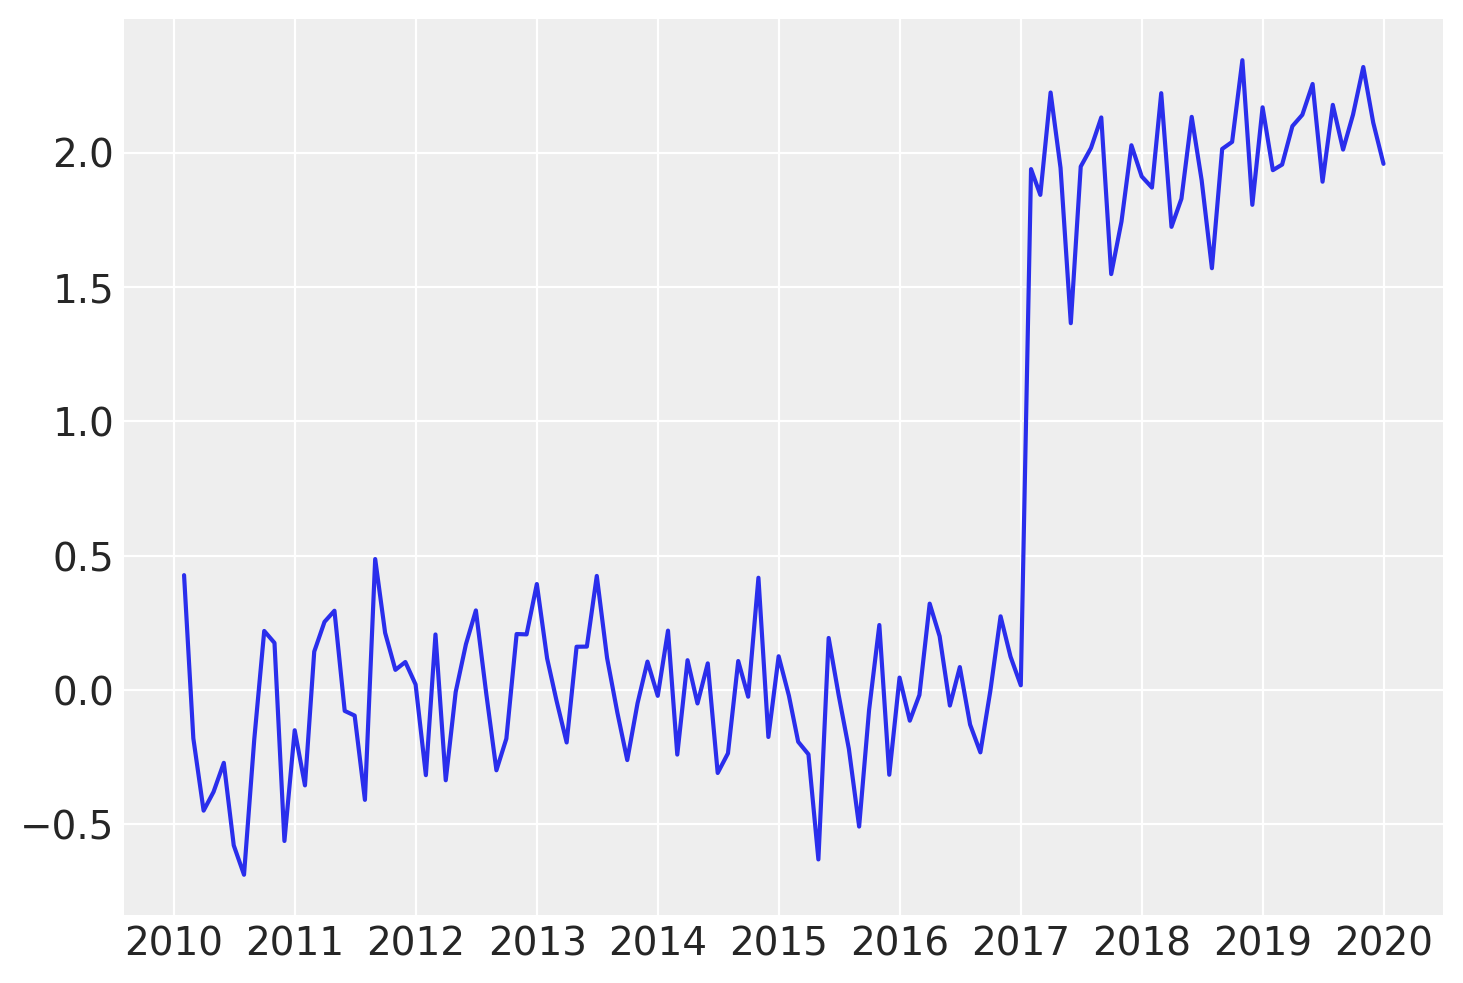

In [13]:
plt.plot(df.index, df['timeseries'])

## Do inference

See if we can infer the causal impact accurately by estimating a synthetic control

In [14]:
result = LinearModel(df, 
                     treatment_date=pd.to_datetime(treatment_time), 
                     target_var="timeseries",
                     predictor_vars=['intercept', 'linear_trend'])

PRIOR PREDICTIVE CHECK
INFERENCE


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 10 seconds.


POSTERIOR PREDICTIVE CHECK


COUNTERFACTUAL INFERENCE


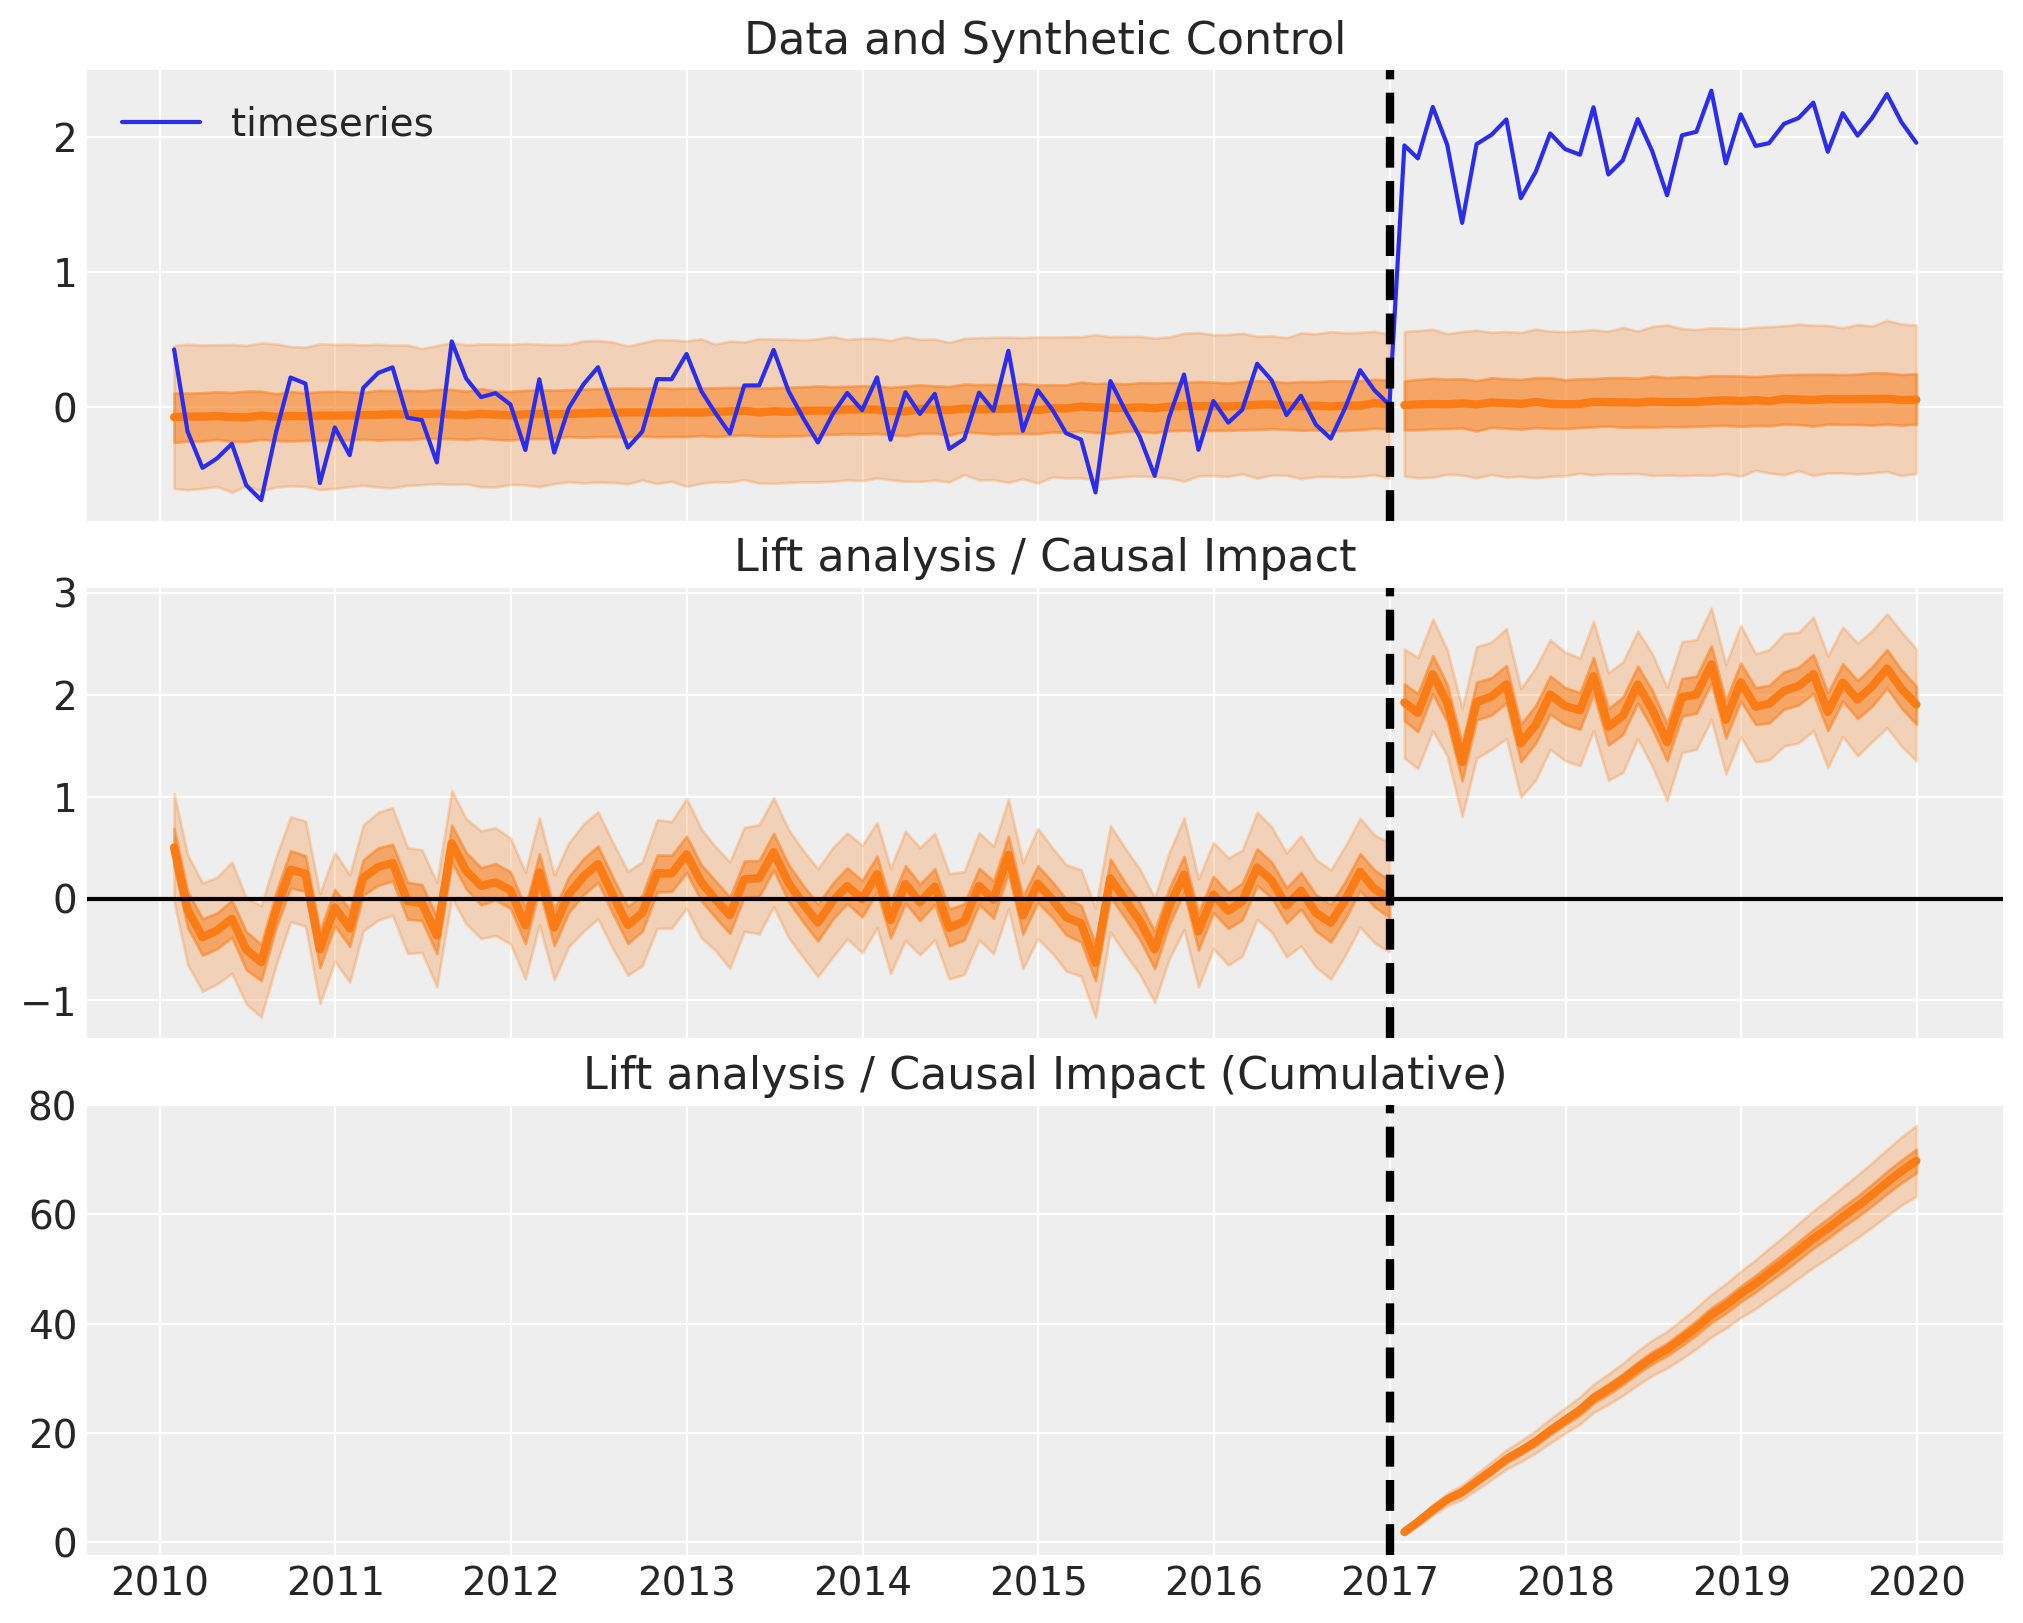

In [15]:
result.plot()

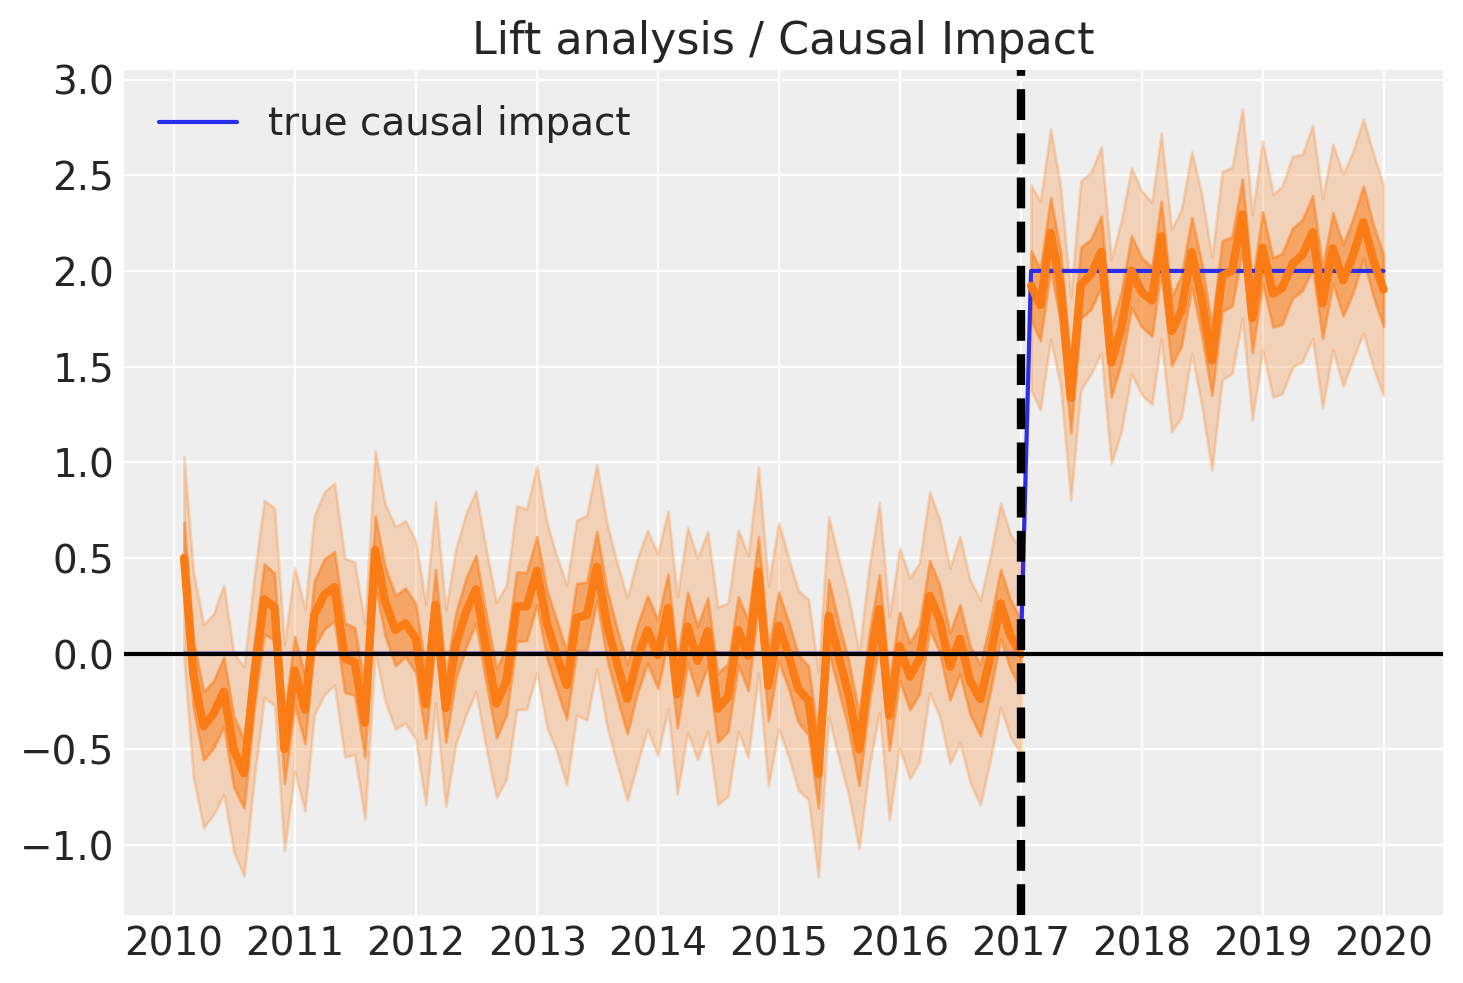

In [16]:
fig, ax = plt.subplots()
ax.plot(df['causal effect'], label='true causal impact')
result.plot_causal_impact(ax=ax)
ax.legend();

Visualise the posterior distributions of the variable weightings.

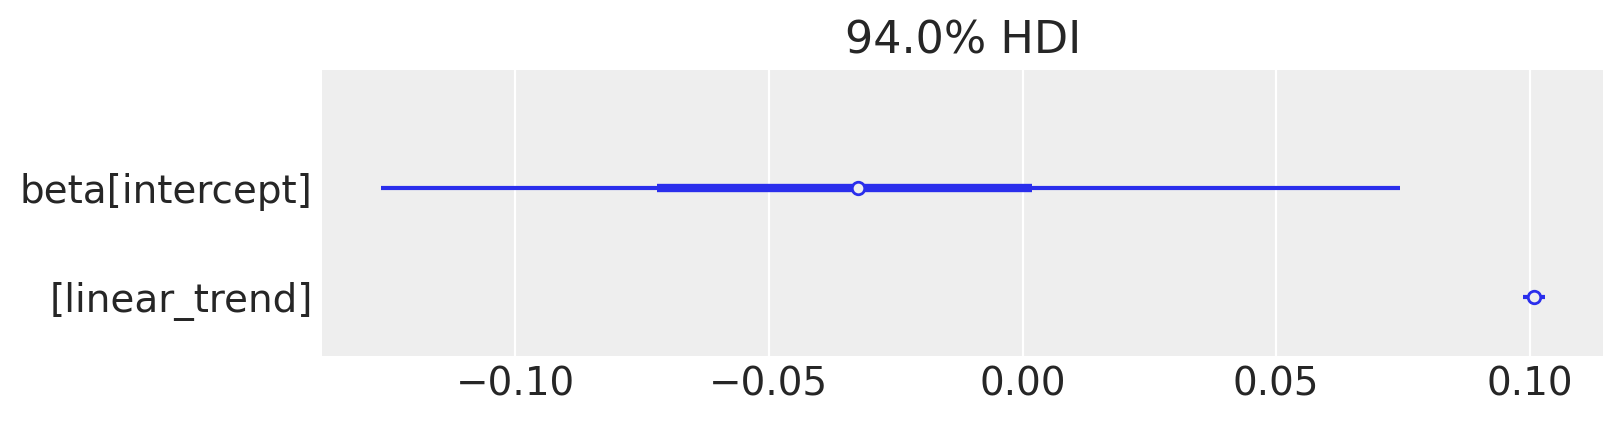

In [10]:
az.plot_forest(result.idata_pre.posterior, var_names="beta", figsize=(8, 2), combined=True);

A similar plot of the posterior distributions of variable weightings, but this time with ground truth of the simulated data.

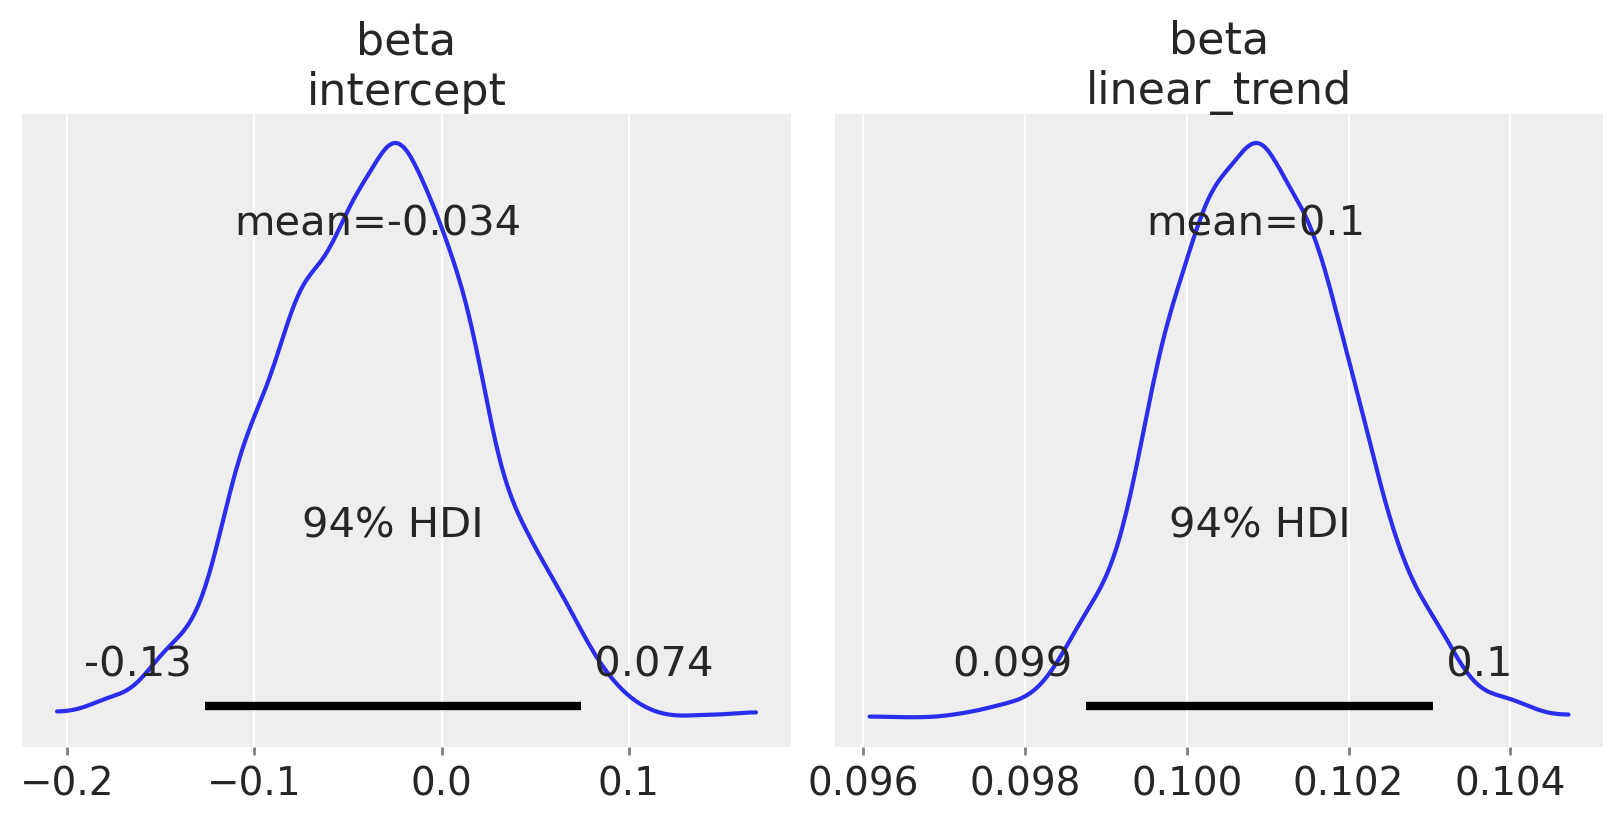

In [11]:
az.plot_posterior(result.idata_pre.posterior['beta'], figsize=(8, 4));